In [53]:
from scipy.io import loadmat
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import datetime as dt
import seaborn as sns
register_matplotlib_converters()
%matplotlib inline

In [44]:
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

def mat2pandas(matdata):
    mattimes =  np.array(matdata['TIME'][0])
    times = [matlab2datetime(time) for time in mattimes]
    temps = matdata['LWIRTemp'][0]
    df = pd.DataFrame({'Time':times, 'LWIRTemp':temps})
    df.set_index('Time',inplace=True)
    return df

In [46]:
matfiles = ['INST_CAL_2019103.mat', 'INST_CAL_2019104.mat','INST_CAL_2019105.mat' ]
pandas_files = [mat2pandas(loadmat(filename)) for filename in matfiles]

In [50]:
pandas_files[0].head()

,LWIRTemp
Time,
2019-04-13 00:00:00.508999,80.879387
2019-04-13 00:00:01.509004,80.885658
2019-04-13 00:00:02.508999,80.806801
2019-04-13 00:00:03.509003,80.865166
2019-04-13 00:00:04.508998,80.855766


Text(0, 0.5, 'LWIRTemp in K')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


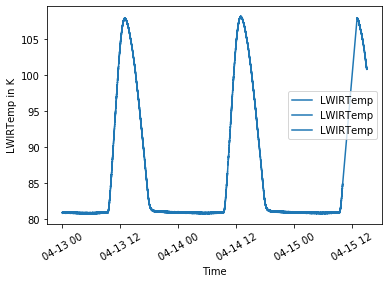

In [69]:
fig, ax = plt.subplots()
for pandas_file in pandas_files:
    sns.lineplot( data=pandas_file,ax=ax)
plt.xticks(rotation=30)
ax.set_ylabel('LWIRTemp in K')